In [1]:
%matplotlib inline


# Digital Image Basics





### our image backbone libraries

In [2]:
#import libraries
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage import data, io, color

### libraries generally good to have around

In [4]:
import os
import glob
import numpy as np
#import pandas as pd
import ipywidgets as widgets
import sys


In [8]:
# configure our data
pict1 = "france_cc0.jpg"

We can open an imagein PIL or Pillow (or opencv for that matter)

In [9]:
# 

#read the image
im = Image.open(pict1)
im.size

(390, 280)

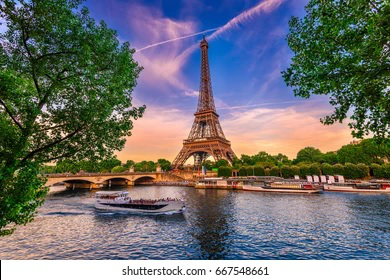

In [10]:
# do not rerun this ce
im

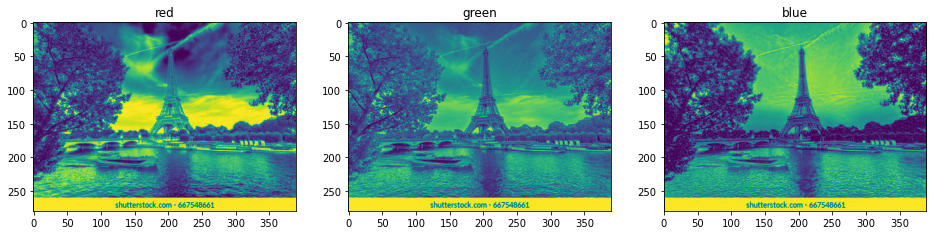

In [21]:
red, green, blue = im.split()
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 6))
x = (red, green, blue)
#axis[0].grid(True)
axis[0].set(title='red')
axis[0].imshow(x[0])
axis[1].set(title='green')
axis[1].imshow(x[1])
axis[2].set(title='blue')
axis[2].imshow(x[2])


In [22]:
data = red, green, blue
data

(<PIL.Image.Image image mode=L size=390x280 at 0x27A5B5E6220>,
 <PIL.Image.Image image mode=L size=390x280 at 0x27A5B5E6190>,
 <PIL.Image.Image image mode=L size=390x280 at 0x27A5B5E6490>)

### This tutorial uses skimage mostly, so let's go with that

In [23]:
#from skimage import data, io, color
image_h = io.imread(pict1)

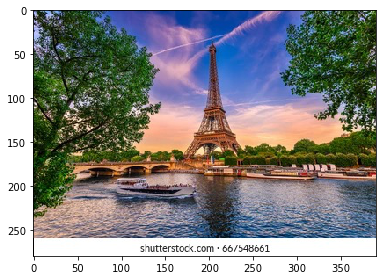

In [24]:
io.imshow(image_h)

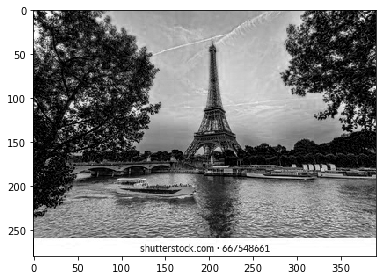

In [25]:
io.imshow(image_h[:, :,2] )  # [row, column, channel], [red, green, blue]

In [26]:
image_h.shape

(280, 390, 3)

In [27]:
image_h.size

327600

In [28]:
mage_h = io.imread(pict1)
print(mage_h.shape,mage_h.min(), mage_h.max(), mage_h.mean())

(280, 390, 3) 0 255 112.91860805860806


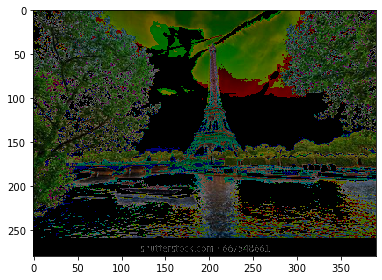

In [29]:
# masking
#lket's turn all the light values black, just because we can
mask = mage_h > 116
# Set black (0) the pixels where mask is True
mage_h[mask] = 0
io.imshow(mage_h)

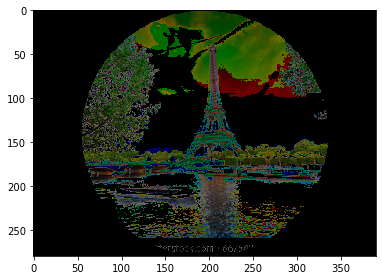

In [30]:
# Ok how about a geographic mask?
nrows, ncols, depth = image_h.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
#outer_disk_mask = 
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
mage_h[outer_disk_mask] = 0
io.imshow(mage_h)


We can also mask in color. Let's go step by step, first showing where the colors are

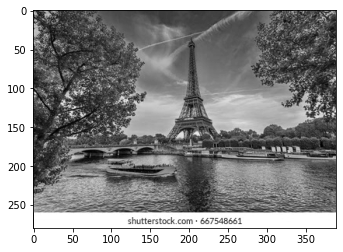

In [31]:
mage_h = io.imread(pict1)
plt.imshow(mage_h[:,:,1], cmap='gray')

[Text(0.5, 1.0, 'all layers')]

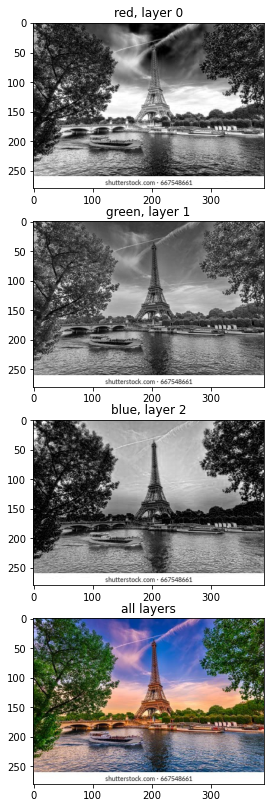

In [32]:
#mage_h = io.imread(pict1)
fig, (ax_1,ax_2,ax_3, ax_4) = plt.subplots(nrows = 4, figsize=(6, 14))
ax_1.imshow(mage_h[:,:,0], cmap='gray')
ax_1.set(title='red, layer 0')
ax_2.imshow(mage_h[:,:,1], cmap='gray')
ax_2.set(title='green, layer 1')
ax_3.imshow(mage_h[:,:,2], cmap='gray')
ax_3.set(title='blue, layer 2')
ax_4.imshow(mage_h[:,:,:],cmap='gray')
ax_4.set(title='all layers')

Now let;s see where red is hot

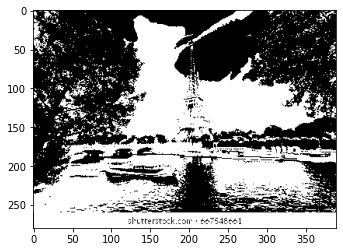

In [33]:
reddish = mage_h[:, :, 0] > 100
plt.imshow(reddish, cmap ='gray')

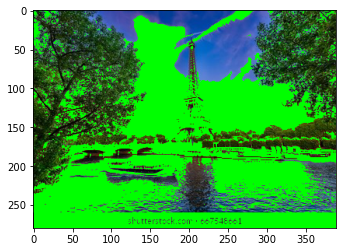

In [34]:
# let's make red green to be fair and share the burdem
mage_h[reddish] = [0, 255, 0]
plt.imshow(mage_h)

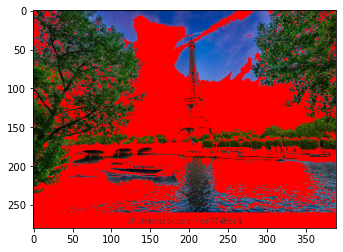

In [35]:
# nah, let a red be a red
mage_h = io.imread(pict1)
reddish = mage_h[:, :, 0] > 100
mage_h[reddish] = [255, 0, 0]
plt.imshow(mage_h)

Fundamentally, you now need to understand digital images as matrices, or stacked matrices or an multidimension array... and whatever library you use you will be fine. 
By the way numpy as a way to have these arrays has it's advantages

In [36]:
 np.lookfor('boundaries', 'skimage') 

Search results for 'boundaries'
-------------------------------
skimage.segmentation.find_boundaries
    Return bool array where boundaries between labeled regions are True.
skimage.segmentation.mark_boundaries
    Return image with boundaries between labeled regions highlighted.
skimage.future.graph.rag_boundary
    Comouter RAG based on region boundaries
skimage.segmentation.boundaries._find_boundaries_subpixel
    Notes
skimage.filters.sato
    Filter an image with the Sato tubeness filter.
skimage.util.montage
    Create a montage of several single- or multichannel images.
skimage.filters.frangi
    Filter an image with the Frangi vesselness filter.
skimage.transform.warp
    Warp an image according to a given coordinate transformation.
skimage.filters.hessian
    Filter an image with the Hybrid Hessian filter.
skimage.transform.swirl
    Perform a swirl transformation.
skimage.transform.resize
    Resize image to match a certain size.
skimage.transform.rotate
    Rotate image by a

Remeber it's all just a big numpy array...
sometimes you might want to transform it

Function names:
	Description

img_as_float
	Convert to floating point (integer types become 64-bit floats)

img_as_ubyte
	Convert to 8-bit uint.

img_as_uint
	Convert to 16-bit uint.

img_as_int
	Convert to 16-bit int.

In [37]:
# example
mage_h = io.imread(pict1)
mage_h

array([[[120, 125, 155],
        [ 35,  41,  73],
        [ 78,  87, 118],
        ...,
        [ 99, 133,  57],
        [ 58,  95,  18],
        [ 29,  66,   0]],

       [[145, 151, 203],
        [ 90,  96, 146],
        [104, 113, 156],
        ...,
        [153, 186, 115],
        [ 91, 127,  55],
        [ 31,  68,   1]],

       [[132, 139, 211],
        [168, 175, 243],
        [143, 154, 210],
        ...,
        [105, 138,  69],
        [ 48,  84,  14],
        [ 48,  84,  20]],

       ...,

       [[  0,   0,   0],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

SO we see dtype here, but we could also check

In [38]:
mage_h.dtype

dtype('uint8')

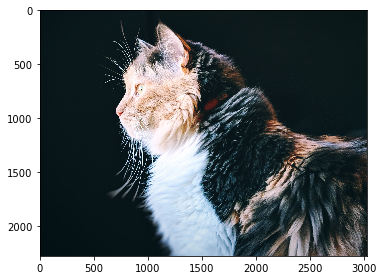

In [40]:
from skimage.util import img_as_ubyte
res_h = io.imread("hi_res_cc0.jpg")
res_h.dtype
# less_info = img_as_ubyte(mage_h)
io.imshow(res_h)


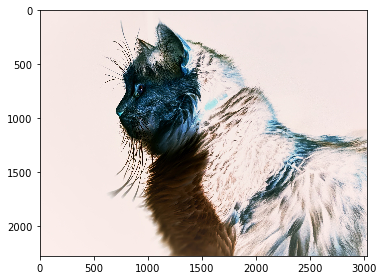

In [41]:
from skimage import util

inverted_img = util.invert(res_h)
io.imshow(inverted_img)

In [42]:
 np.lookfor('denoise', 'skimage') 

Search results for 'denoise'
----------------------------
skimage.restoration.denoise_bilateral
    Denoise image using bilateral filter.
skimage.restoration.j_invariant._invariant_denoise
    Apply a J-invariant version of `denoise_function`.
skimage.restoration.j_invariant._calibrate_denoiser_search
    Return a parameter search history with losses for a denoise function.
skimage.restoration.denoise_wavelet
    Perform wavelet denoising on an image.
skimage.restoration.cycle_spin
    Cycle spinning (repeatedly apply func to shifted versions of x).
skimage.restoration.denoise_nl_means
    Perform non-local means denoising on 2D-4D grayscale or RGB images.
skimage.restoration.calibrate_denoiser
    Calibrate a denoising function and return optimal J-invariant version.
skimage.restoration.denoise_tv_bregman
    Perform total-variation denoising using split-Bregman optimization.
skimage.restoration.denoise_tv_chambolle
    Perform total-variation denoising on n-dimensional images.
skimag

In [43]:
from skimage import exposure
hist = exposure.histogram(res_h)
hist

C:\Users\makeda\anaconda3\envs\image_processing\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


(array([   5564,    2796,    4781,   44933,  110568,  151400,  290263,
         395058,  472779,  662036,  613535,  469021,  392517,  226725,
         168266,  121466,   75214,  100181,  163795,  224324,  482201,
         585030,  658931,  901347, 1079375, 1181361, 1317283, 1019522,
         519554,  252825,  170031,  139047,  123512,  112458,  104970,
          98276,   91675,   86942,   82127,   77940,   74229,   71528,
          68283,   64472,   62561,   59702,   57846,   55807,   53700,
          51852,   49959,   48273,   46907,   44748,   43401,   42105,
          40858,   39655,   38637,   37446,   35997,   35290,   34626,
          33568,   33097,   32161,   31312,   31031,   30476,   29661,
          28703,   28519,   27576,   27346,   26894,   26600,   25850,
          25344,   24597,   24398,   24049,   23544,   23079,   22730,
          22526,   22206,   21718,   21352,   21209,   20724,   20633,
          20707,   20288,   19963,   19941,   19739,   19426,   19609,
      

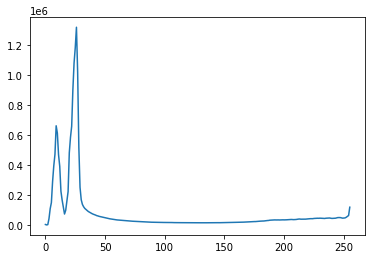

In [44]:
plt.plot(hist[1],hist[0])

# The histogram is the basis for a lot of manipulations....
In skikmage.exposure we can use rescale intensity though

# For rescaling go straight into the documentation here:
https://scikit-image.org/docs/stable/user_guide/geometrical_transform.html#cropping-resizing-and-rescaling-images

# Getting fancy?

Any geometrical transformation you can code, 

# More fancy, but automated?

Built in -feature detection
By the way feature detection of edges is one way to go for segmentation

# Going genius?

check out the denoising algorithms, then write your own
